In [1]:
import sys
import numpy as np
import matplotlib
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

In [2]:
# Neural Network (scratch and simple)
inputs = [1, 2, 3, 2.5] # data from the sensors or image pixels
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

biases  = [2, 3, 0.5]

layer_outputs = []
for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_op = 0
    for n_inp, weight in zip(inputs, neuron_weights):
        neuron_op += n_inp*weight
    neuron_op += neuron_bias
    layer_outputs.append(neuron_op)
 

In [3]:
inputs = np.array([[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]])

#input layer:
weights = np.array([[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

biases  = np.array([2, 3, 0.5])

#second layer:
weights2 = np.array([
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44 , 0.73, -0.13]
])

biases2  = np.array([-1, 2, -0.5])

layer1_outputs = np.dot(inputs, weights.T) + biases
layer2_outputs = np.dot(layer1_outputs, weights2.T) + biases2
layer2_outputs


array([[ 0.50310004, -1.04184985, -2.03874993],
       [ 0.24339998, -2.73320007, -5.76329994],
       [-0.99314   ,  1.41254002, -0.35655001]])

In [26]:
import numpy as np
import matplotlib
from keras.datasets import mnist
import matplotlib.pyplot as plt
(trainX, trainy), (testX, testy) = mnist.load_data()

#In OOP:

class Layer_Dense:
    def __init__(self, n_inputs, n_neorons):
        self.weights = 0.1* np.random.randn(n_inputs, n_neorons)
        self.biases = np.zeros((1, n_neorons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)



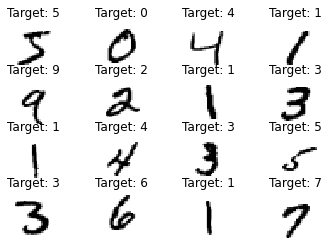

In [27]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
(trainX, trainy), (testX, testy) = mnist.load_data()
x = range(28)
_, axes = plt.subplots(4,4)
from time import sleep
i = 0
for axe in axes:
    for ax in axe:
        ax.set_axis_off()
        ax.imshow(trainX[i], cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Target: '+str(trainy[i]))
        i += 1


<h1>MNIST data example from the video below</h1>
<a href="https://www.youtube.com/watch?v=kOFUQB7u5Ck&t=4s&ab_channel=ComputerScience"> Youtube Video Link </a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import mnist

#load data sets

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# normalize the pixel values from [0, 255] to [-0.5, 0.5] for training network easily
# train_images = (train_images/255) - 0.5
# test_images = (test_images/255) - 0.5

#flattening the images each by 28x28 = 784 dimenstional vector  to pass in the neurons
# data shapes respectively: train -> (60000, 784)
# test -> (10000, 784)
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))

# build 3 layer with 63 neurons and relu function
# 1 layer with 10 neurons and softmax function

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [31]:
#compile the model
# the loss function measures how well the model did while training and tries to improve by an optimizer
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
#training
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=8,
    batch_size=32
)

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2162 - accuracy: 0.9420
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1924 - accuracy: 0.9471
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1822 - accuracy: 0.9499
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1652 - accuracy: 0.9537
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1544 - accuracy: 0.9569
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1413 - accuracy: 0.9605
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1367 - accuracy: 0.9620
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1306 - accuracy: 0.9636


In [34]:
#evaluate the model:
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.1721 - accuracy: 0.9522


[0.17211364209651947, 0.9521999955177307]

In [35]:
#predicting images
predictions = model.predict(test_images[:5])
print(np.argmax(predictions, axis = 1))

[7 2 1 0 4]


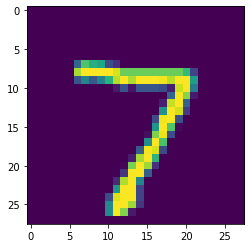

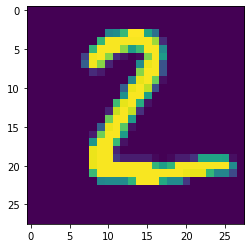

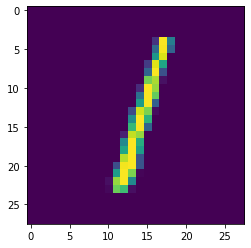

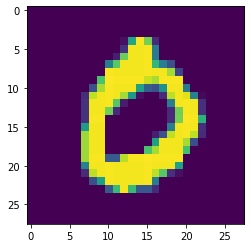

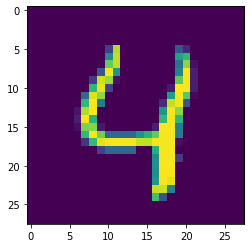

In [36]:
for i in range(0,5):
  first_images = np.array(test_images[i], dtype='float')
  pixels = first_images.reshape((28,28))
  plt.imshow(pixels)
  plt.show()
